<a href="https://colab.research.google.com/github/Mizanur4E/GaTech_PhD/blob/main/NNS_Hardware.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Clone the YoutubeDeepRecommendation Repo!

In [ ]:
! git clone https://github.com/hyez/Deep-Youtube-Recommendations.git

Cloning into 'Deep-Youtube-Recommendations'...
remote: Enumerating objects: 370, done.
remote: Counting objects: 100% (370/370), done.
remote: Compressing objects: 100% (185/185), done.
remote: Total 370 (delta 172), reused 322 (delta 127), pack-reused 0
Receiving objects: 100% (370/370), 10.52 MiB | 20.52 MiB/s, done.
Resolving deltas: 100% (172/172), done.


### Data Preprocessing

In [ ]:
import pandas as pd
users_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('./Deep-Youtube-Recommendations/data/ml-100k/u.user', sep='|', names=users_cols, encoding='latin-1')
users

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [ ]:
ratings_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('./Deep-Youtube-Recommendations/data/ml-100k/u.data', sep='\t', names=ratings_cols, encoding='latin-1')
ratings

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [ ]:
import pandas as pd

# Assuming df_users and df_ratings are your dataframes

# Step 1: Group ratings by user_id and aggregate movie_ids, watch_time, and ratings
grouped_ratings = ratings.groupby('user_id').agg({
    'movie_id': lambda x: list(x),
    'unix_timestamp': lambda x: list(x),
    'rating': lambda x: list(x)
}).reset_index()

# Step 2: Merge grouped_ratings with df_users on user_id
merged_df = pd.merge(users, grouped_ratings, on='user_id', how='left')

# Step 3: Select only the required columns
final_df = merged_df[['user_id', 'age', 'movie_id', 'unix_timestamp', 'rating']]

# # Rename the columns for consistency
final_df.columns = ['user_id', 'age', 'movie_ids_list', 'watch_time_list', 'rating_list']



final_df

,user_id,age,movie_ids_list,watch_time_list,rating_list
0,1,24,"[61, 189, 33, 160, 20, 202, 171, 265, 155, 117...","[878542420, 888732928, 878542699, 875072547, 8...","[4, 3, 4, 4, 4, 5, 5, 4, 2, 3, 4, 4, 5, 5, 4, ..."
1,2,53,"[292, 251, 50, 314, 297, 290, 312, 281, 13, 28...","[888550774, 888552084, 888552084, 888980085, 8...","[4, 5, 5, 1, 4, 3, 3, 3, 4, 3, 4, 3, 3, 4, 5, ..."
2,3,23,"[335, 245, 337, 343, 323, 331, 294, 332, 328, ...","[889237269, 889237247, 889236983, 889237122, 8...","[1, 1, 1, 3, 2, 4, 2, 1, 5, 3, 3, 1, 4, 2, 3, ..."
3,4,24,"[264, 303, 361, 357, 260, 356, 294, 288, 50, 3...","[892004275, 892002352, 892002353, 892003525, 8...","[3, 5, 5, 4, 4, 3, 5, 4, 5, 5, 4, 5, 3, 5, 3, ..."
4,5,33,"[2, 17, 439, 225, 110, 454, 424, 1, 363, 98, 1...","[875636053, 875636198, 878844423, 875635723, 8...","[3, 4, 1, 2, 1, 1, 1, 4, 3, 3, 3, 4, 5, 2, 4, ..."
...,...,...,...,...,...
938,939,26,"[931, 106, 258, 1054, 689, 476, 409, 121, 1190...","[880262196, 880262019, 880260692, 880261868, 8...","[2, 3, 4, 4, 5, 5, 4, 5, 5, 4, 5, 4, 5, 3, 2, ..."
939,940,32,"[193, 568, 14, 205, 272, 655, 315, 66, 873, 28...","[885921893, 885921870, 885921710, 885921243, 8...","[3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 5, 5, 4, 3, 5, ..."
940,941,20,"[147, 124, 117, 181, 993, 258, 7, 475, 257, 15...","[875049077, 875048996, 875048886, 875048887, 8...","[4, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 2, 2, 3, 5, ..."
941,942,48,"[117, 200, 604, 423, 261, 427, 487, 323, 615, ...","[891282816, 891282840, 891283139, 891283095, 8...","[4, 4, 4, 5, 4, 5, 4, 3, 3, 4, 5, 3, 3, 2, 4, ..."


In [ ]:
min_movies_length = final_df['movie_ids_list'].apply(len).min()
min_movies_length

20

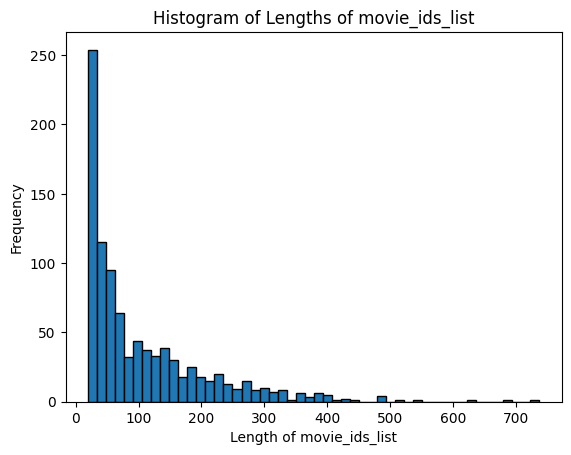

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'final_df' is your DataFrame
lengths = final_df['movie_ids_list'].apply(len)

# Create a histogram
plt.hist(lengths, bins=50, edgecolor='k')

# Set labels and title
plt.xlabel('Length of movie_ids_list')
plt.ylabel('Frequency')
plt.title('Histogram of Lengths of movie_ids_list')

# Show the plot
plt.show()


In [ ]:
import pandas as pd

# Assuming df is your DataFrame with the required columns

# Create a new column 'recom_mov' and remove corresponding movie_id from lists
def find_recommended_movie(row):

    recom_mov = []
    index = []
    for i, rating in enumerate(row['rating_list']):
        if rating > 3 and i > 19:
            recom_mov.append(row['movie_ids_list'][i])
            index.append(i)
            # Omit the recommended movie from the lists
            # row['movie_ids_list'].remove(recom_mov)
            # row['watch_time_list'].remove(row['watch_time_list'][i])
            # row['rating_list'].remove(row['rating_list'][i])



    return recom_mov, index


final_df['recom_mov']= final_df.apply(find_recommended_movie, axis=1)

# Print the modified DataFrame
print(final_df)


     user_id  age                                     movie_ids_list  \
0          1   24  [61, 189, 33, 160, 20, 202, 171, 265, 155, 117...   
1          2   53  [292, 251, 50, 314, 297, 290, 312, 281, 13, 28...   
2          3   23  [335, 245, 337, 343, 323, 331, 294, 332, 328, ...   
3          4   24  [264, 303, 361, 357, 260, 356, 294, 288, 50, 3...   
4          5   33  [2, 17, 439, 225, 110, 454, 424, 1, 363, 98, 1...   
..       ...  ...                                                ...   
938      939   26  [931, 106, 258, 1054, 689, 476, 409, 121, 1190...   
939      940   32  [193, 568, 14, 205, 272, 655, 315, 66, 873, 28...   
940      941   20  [147, 124, 117, 181, 993, 258, 7, 475, 257, 15...   
941      942   48  [117, 200, 604, 423, 261, 427, 487, 323, 615, ...   
942      943   22  [58, 111, 11, 570, 232, 1067, 808, 356, 186, 2...   

                                       watch_time_list  \
0    [878542420, 888732928, 878542699, 875072547, 8...   
1    [888550774, 88

<ipython-input-7-ccbcf4badc42>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['recom_mov']= final_df.apply(find_recommended_movie, axis=1)


In [ ]:
final_df['recom_mov'][0][1][17-2:23-2]

[46, 50, 53, 54, 55, 56]

In [ ]:
import pandas as pd

# Assuming df is your DataFrame with user data
# Create empty lists to store the processed data
new_data = {'user_id': [], 'age': [], 'movie_ids_list': [], 'watch_time_list': [], 'rating_list': [], 'recom_mov': []}

for index, row in final_df.iterrows():
    # Get the original lists
    movie_ids_list = row['movie_ids_list']
    watch_time_list = row['watch_time_list']
    rating_list = row['rating_list']
    #print(row)
    # Check if any of the lists have less than 20 items
    if len(movie_ids_list) >= 19 and len(watch_time_list) >= 19 and len(rating_list) >= 19:
        # If all lists have at least 20 items, take the first 20 items from each

        for i in range(len(row['recom_mov'][1])):



            new_data['user_id'].append(row['user_id'])
            new_data['age'].append(row['age'])
            new_data['movie_ids_list'].append(movie_ids_list[row['recom_mov'][1][i]-19:row['recom_mov'][1][i]])
            new_data['watch_time_list'].append(watch_time_list[row['recom_mov'][1][i]-19:row['recom_mov'][1][i]])
            new_data['rating_list'].append(rating_list[row['recom_mov'][1][i]-19:row['recom_mov'][1][i]])
            new_data['recom_mov'].append(row['recom_mov'][0][i])
    else:
        # Handle the case where one or more lists have fewer than 20 items
        pass

# Create a new DataFrame with the processed data
new_df = pd.DataFrame(new_data)
new_df

,user_id,age,movie_ids_list,watch_time_list,rating_list,recom_mov
0,1,24,"[33, 160, 20, 202, 171, 265, 155, 117, 47, 222...","[878542699, 875072547, 887431883, 875072442, 8...","[4, 4, 4, 5, 5, 4, 2, 3, 4, 4, 5, 5, 4, 3, 4, ...",121
1,1,24,"[160, 20, 202, 171, 265, 155, 117, 47, 222, 25...","[875072547, 887431883, 875072442, 889751711, 8...","[4, 4, 5, 5, 4, 2, 3, 4, 4, 5, 5, 4, 3, 4, 5, ...",114
2,1,24,"[20, 202, 171, 265, 155, 117, 47, 222, 253, 11...","[887431883, 875072442, 889751711, 878542441, 8...","[4, 5, 5, 4, 2, 3, 4, 4, 5, 5, 4, 3, 4, 5, 3, ...",132
3,1,24,"[171, 265, 155, 117, 47, 222, 253, 113, 227, 1...","[889751711, 878542441, 878542201, 874965739, 8...","[5, 4, 2, 3, 4, 4, 5, 5, 4, 3, 4, 5, 3, 5, 1, ...",134
4,1,24,"[265, 155, 117, 47, 222, 253, 113, 227, 17, 90...","[878542441, 878542201, 874965739, 875072125, 8...","[4, 2, 3, 4, 4, 5, 5, 4, 3, 4, 5, 3, 5, 1, 4, ...",98
...,...,...,...,...,...,...
44471,943,22,"[217, 41, 92, 50, 367, 585, 427, 185, 403, 401...","[888640067, 888640251, 888639660, 875501835, 8...","[3, 4, 5, 4, 4, 1, 4, 2, 4, 1, 4, 4, 4, 4, 5, ...",672
44472,943,22,"[427, 185, 403, 401, 576, 717, 216, 763, 69, 1...","[888639147, 888639370, 888639746, 888639867, 8...","[4, 2, 4, 1, 4, 4, 4, 4, 5, 2, 4, 5, 3, 5, 3, ...",193
44473,943,22,"[185, 403, 401, 576, 717, 216, 763, 69, 168, 5...","[888639370, 888639746, 888639867, 888640106, 8...","[2, 4, 1, 4, 4, 4, 4, 5, 2, 4, 5, 3, 5, 3, 3, ...",470
44474,943,22,"[576, 717, 216, 763, 69, 168, 526, 196, 9, 672...","[888640106, 875502116, 888639327, 875501813, 8...","[4, 4, 4, 4, 5, 2, 4, 5, 3, 5, 3, 3, 3, 1, 3, ...",219


In [ ]:
max_movies_length = new_df['movie_ids_list'].apply(len).max()
max_movies_length

19

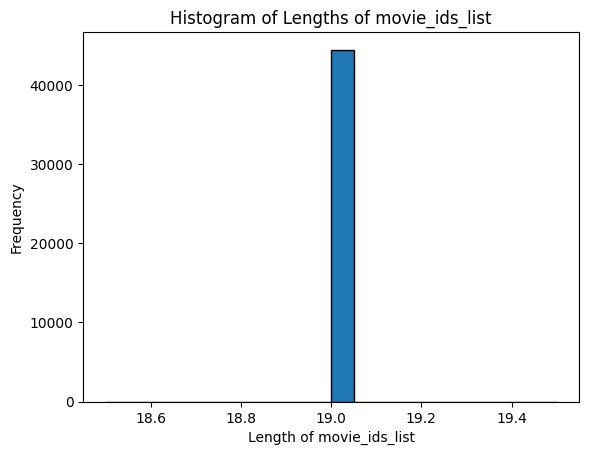

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'final_df' is your DataFrame
lengths = new_df['movie_ids_list'].apply(len)

# Create a histogram
plt.hist(lengths, bins=20, edgecolor='k')

# Set labels and title
plt.xlabel('Length of movie_ids_list')
plt.ylabel('Frequency')
plt.title('Histogram of Lengths of movie_ids_list')

# Show the plot
plt.show()


In [ ]:
max_movies_length = new_df['movie_ids_list'].apply(len).min()
max_movies_length

19

In [ ]:
new_df =  new_df.dropna(subset=['recom_mov'])

In [ ]:
nan_recom_mov = new_df[new_df['recom_mov'].isna()]

# Print rows with NaN in 'recom_mov' column
print(nan_recom_mov)

Empty DataFrame
Columns: [user_id, age, movie_ids_list, watch_time_list, rating_list, recom_mov]
Index: []


In [ ]:
new_df

,user_id,age,movie_ids_list,watch_time_list,rating_list,recom_mov
0,1,24,"[33, 160, 20, 202, 171, 265, 155, 117, 47, 222...","[878542699, 875072547, 887431883, 875072442, 8...","[4, 4, 4, 5, 5, 4, 2, 3, 4, 4, 5, 5, 4, 3, 4, ...",121
1,1,24,"[160, 20, 202, 171, 265, 155, 117, 47, 222, 25...","[875072547, 887431883, 875072442, 889751711, 8...","[4, 4, 5, 5, 4, 2, 3, 4, 4, 5, 5, 4, 3, 4, 5, ...",114
2,1,24,"[20, 202, 171, 265, 155, 117, 47, 222, 253, 11...","[887431883, 875072442, 889751711, 878542441, 8...","[4, 5, 5, 4, 2, 3, 4, 4, 5, 5, 4, 3, 4, 5, 3, ...",132
3,1,24,"[171, 265, 155, 117, 47, 222, 253, 113, 227, 1...","[889751711, 878542441, 878542201, 874965739, 8...","[5, 4, 2, 3, 4, 4, 5, 5, 4, 3, 4, 5, 3, 5, 1, ...",134
4,1,24,"[265, 155, 117, 47, 222, 253, 113, 227, 17, 90...","[878542441, 878542201, 874965739, 875072125, 8...","[4, 2, 3, 4, 4, 5, 5, 4, 3, 4, 5, 3, 5, 1, 4, ...",98
...,...,...,...,...,...,...
44471,943,22,"[217, 41, 92, 50, 367, 585, 427, 185, 403, 401...","[888640067, 888640251, 888639660, 875501835, 8...","[3, 4, 5, 4, 4, 1, 4, 2, 4, 1, 4, 4, 4, 4, 5, ...",672
44472,943,22,"[427, 185, 403, 401, 576, 717, 216, 763, 69, 1...","[888639147, 888639370, 888639746, 888639867, 8...","[4, 2, 4, 1, 4, 4, 4, 4, 5, 2, 4, 5, 3, 5, 3, ...",193
44473,943,22,"[185, 403, 401, 576, 717, 216, 763, 69, 168, 5...","[888639370, 888639746, 888639867, 888640106, 8...","[2, 4, 1, 4, 4, 4, 4, 5, 2, 4, 5, 3, 5, 3, 3, ...",470
44474,943,22,"[576, 717, 216, 763, 69, 168, 526, 196, 9, 672...","[888640106, 875502116, 888639327, 875501813, 8...","[4, 4, 4, 4, 5, 2, 4, 5, 3, 5, 3, 3, 3, 1, 3, ...",219


In [ ]:
# Find the global maximum for watch_time_list and rating_list
global_max_watch_time = new_df['watch_time_list'].apply(max).max()
global_min_watch_time = new_df['watch_time_list'].apply(min).min()

global_max_rating = new_df['rating_list'].apply(max).max()
global_min_rating = new_df['rating_list'].apply(min).min()


# Apply max-based normalization to age
new_df['age'] = (new_df['age']-new_df['age'].min()) /(new_df['age'].max()- new_df['age'].min())

# Apply max-based normalization to watch_time_list
new_df['watch_time_list'] = new_df['watch_time_list'].apply(
    lambda x: [(val - global_min_watch_time)/ (global_max_watch_time - global_min_watch_time) for val in x]
)

# Apply max-based normalization to rating_list
new_df['rating_list'] = new_df['rating_list'].apply(
    lambda x: [(val - global_min_rating)/ (global_max_rating - global_min_rating) for val in x]
)

new_df

,user_id,age,movie_ids_list,watch_time_list,rating_list,recom_mov
0,1,0.257576,"[33, 160, 20, 202, 171, 265, 155, 117, 47, 222...","[0.20568963521123626, 0.0187393063843219, 0.68...","[0.75, 0.75, 0.75, 1.0, 1.0, 0.75, 0.25, 0.5, ...",121
1,1,0.257576,"[160, 20, 202, 171, 265, 155, 117, 47, 222, 25...","[0.0187393063843219, 0.6845838945413596, 0.018...","[0.75, 0.75, 1.0, 1.0, 0.75, 0.25, 0.5, 0.75, ...",114
2,1,0.257576,"[20, 202, 171, 265, 155, 117, 47, 222, 253, 11...","[0.6845838945413596, 0.018733649633687684, 0.8...","[0.75, 1.0, 1.0, 0.75, 0.25, 0.5, 0.75, 0.75, ...",132
3,1,0.257576,"[171, 265, 155, 117, 47, 222, 253, 113, 227, 1...","[0.8095618803534748, 0.20567573576682077, 0.20...","[1.0, 0.75, 0.25, 0.5, 0.75, 0.75, 1.0, 1.0, 0...",134
4,1,0.257576,"[265, 155, 117, 47, 222, 253, 113, 227, 17, 90...","[0.20567573576682077, 0.20566280605108542, 0.0...","[0.75, 0.25, 0.5, 0.75, 0.75, 1.0, 1.0, 0.75, ...",98
...,...,...,...,...,...,...
44471,943,0.227273,"[217, 41, 92, 50, 367, 585, 427, 185, 403, 401...","[0.7496733765246896, 0.7496832893067533, 0.749...","[0.5, 0.75, 1.0, 0.75, 0.75, 0.0, 0.75, 0.25, ...",672
44472,943,0.227273,"[427, 185, 403, 401, 576, 717, 216, 763, 69, 1...","[0.7496238126143707, 0.7496358264752415, 0.749...","[0.75, 0.25, 0.75, 0.0, 0.75, 0.75, 0.75, 0.75...",193
44473,943,0.227273,"[185, 403, 401, 576, 717, 216, 763, 69, 168, 5...","[0.7496358264752415, 0.7496560830298935, 0.749...","[0.25, 0.75, 0.0, 0.75, 0.75, 0.75, 0.75, 1.0,...",470
44474,943,0.227273,"[576, 717, 216, 763, 69, 168, 526, 196, 9, 672...","[0.7496754776034966, 0.041881827462317556, 0.7...","[0.75, 0.75, 0.75, 0.75, 1.0, 0.25, 0.75, 1.0,...",219


## The network and training

In [ ]:
#---inputs
import tensorflow as tf
import datetime
import sys, os
sys.path.append(os.pardir)

EMBEDDING_DIM = 128
DENSE_UNITS = 64
DROPOUT_PCT = 0.0
ALPHA = 0.0
NUM_CLASSES=11
LEARNING_RATE = 0.003
movie_vocab_size = 1683


import tensorflow as tf
class MaskedEmbeddingsAggregatorLayer(tf.keras.layers.Layer):
    def __init__(self, agg_mode='sum', **kwargs):
        super(MaskedEmbeddingsAggregatorLayer, self).__init__(**kwargs)

        if agg_mode not in ['sum', 'mean']:
            raise NotImplementedError('mode {} not implemented!'.format(agg_mode))
        self.agg_mode = agg_mode

    @tf.function
    def call(self, inputs, mask=None):
        masked_embeddings = tf.ragged.boolean_mask(inputs, mask)
        if self.agg_mode == 'sum':
            aggregated =  tf.reduce_sum(masked_embeddings, axis=1)
        elif self.agg_mode == 'mean':
            aggregated = tf.reduce_mean(masked_embeddings, axis=1)
        return aggregated

    def get_config(self):
        # this is used when loading a saved model that uses a custom layer
        return {'agg_mode': self.agg_mode}

class L2NormLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(L2NormLayer, self).__init__(**kwargs)

    @tf.function
    def call(self, inputs, mask=None):
        if mask is not None:
            inputs = tf.ragged.boolean_mask(inputs, mask).to_tensor()
        return tf.math.l2_normalize(inputs, axis=-1)

    def compute_mask(self, inputs, mask):
        return mask

class CandidateGeneration(object):
    def __init__(self, trainable=True):

        self.trainable = trainable

    def build_nework(self):

        input_age = tf.keras.Input(shape=(1,), name='age')
      # input_watch_time_list = tf.keras.layers.Input(shape=(19,), name='watch_time_list')
      # input_rating_list = tf.keras.layers.Input(shape=(19,), name='rating_list')
        input_movie_id_list = tf.keras.Input(shape=(19,), name='movie_id_list')


        #--- layers
        features_embedding_layer = tf.keras.layers.Embedding(input_dim= movie_vocab_size, output_dim= EMBEDDING_DIM, mask_zero=True, trainable=True, name='features_embeddings')
        # labels_embedding_layer = tf.keras.layers.Embedding(input_dim= NUM_CLASSES, output_dim= EMBEDDING_DIMS,mask_zero=True, trainable=True, name='labels_embeddings')

        avg_embeddings = MaskedEmbeddingsAggregatorLayer(agg_mode='mean', name='aggregate_embeddings')

        dense_1 = tf.keras.layers.Dense(units= 256, name='dense_1', activation='relu')
        dense_2 = tf.keras.layers.Dense(units= 128, name='dense_2', activation= 'relu')


        l2_norm_1 = L2NormLayer(name='l2_norm_1')

        dense_output = tf.keras.layers.Dense( movie_vocab_size, activation=tf.nn.softmax, name='dense_output')

        #--- features
        features_embeddings = features_embedding_layer(input_movie_id_list)
        l2_norm_features = l2_norm_1(features_embeddings)
        avg_features = avg_embeddings(l2_norm_features)




        # 임베딩 벡터들 연결
        concat_inputs = tf.keras.layers.Concatenate(axis=1)([avg_features,
                                                             input_age,
                                                             ])
        # Dense Layers
        dense_1_features = dense_1(concat_inputs)
        dense_1_batch_norm = tf.keras.layers.BatchNormalization(name='dense_1_batchNorm')(dense_1_features)
        dense_2_features = dense_2(dense_1_batch_norm )
        dense_2_batch_norm = tf.keras.layers.BatchNormalization(name='dense_2_batchNorm')(dense_2_features)
        outputs = dense_output(dense_2_batch_norm)

        #Optimizer
        optimiser = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

        #--- prep model
        model = tf.keras.models.Model(
            inputs=[input_age,
                    input_movie_id_list,
                    ],
            outputs=[outputs]
        )
        logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
        tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
        model.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics=[tf.keras.metrics.CosineSimilarity(axis=1),'acc'])

        self.model = model

        return model

    def save(self):
        self.model.save("candidate_generation.h5")

    def summary(self):
        self.model.summary()


In [ ]:
model = CandidateGeneration().build_nework()

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 movie_id_list (InputLayer)  [(None, 19)]                 0         []                            
                                                                                                  
 features_embeddings (Embed  (None, 19, 128)              215424    ['movie_id_list[0][0]']       
 ding)                                                                                            
                                                                                                  
 l2_norm_1 (L2NormLayer)     (None, None, 128)            0         ['features_embeddings[0][0]'] 
                                                                                                  
 aggregate_embeddings (Mask  (None, 128)                  0         ['l2_norm_1[0][0]']       

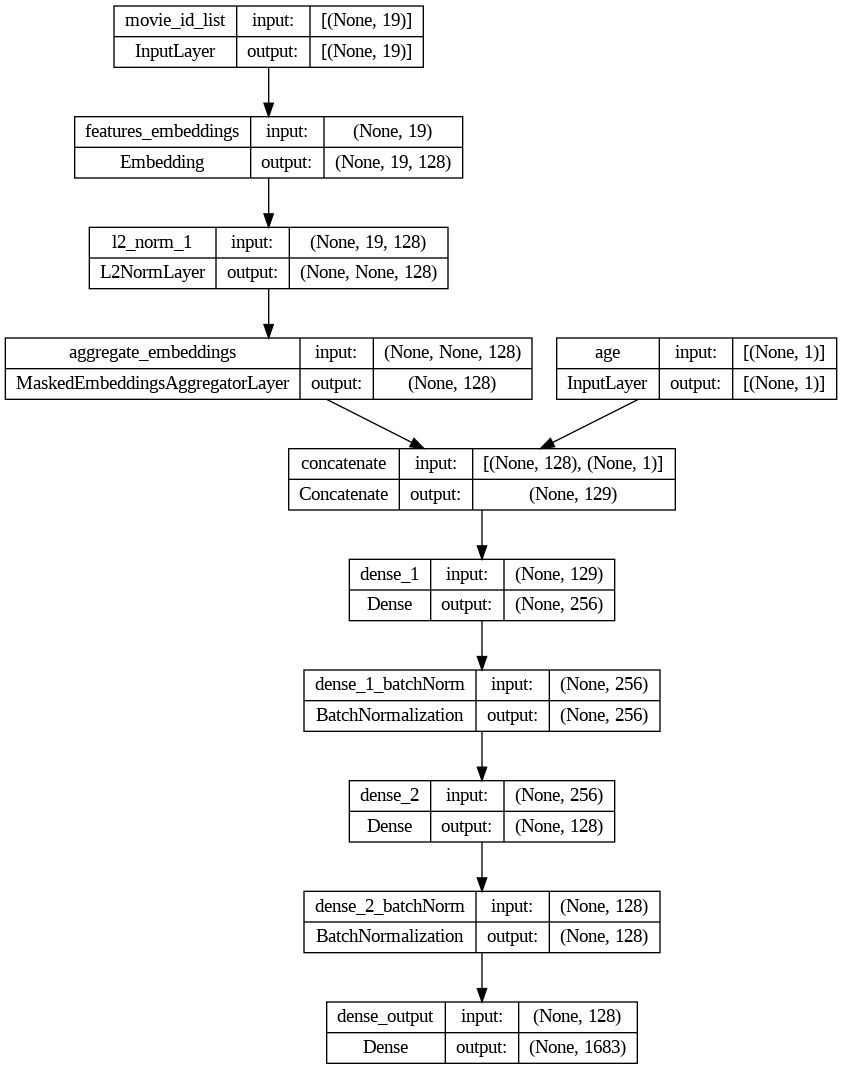

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
new_df

,user_id,age,movie_ids_list,watch_time_list,rating_list,recom_mov
0,1,0.257576,"[33, 160, 20, 202, 171, 265, 155, 117, 47, 222...","[0.20568963521123626, 0.0187393063843219, 0.68...","[0.75, 0.75, 0.75, 1.0, 1.0, 0.75, 0.25, 0.5, ...",121
1,1,0.257576,"[160, 20, 202, 171, 265, 155, 117, 47, 222, 25...","[0.0187393063843219, 0.6845838945413596, 0.018...","[0.75, 0.75, 1.0, 1.0, 0.75, 0.25, 0.5, 0.75, ...",114
2,1,0.257576,"[20, 202, 171, 265, 155, 117, 47, 222, 253, 11...","[0.6845838945413596, 0.018733649633687684, 0.8...","[0.75, 1.0, 1.0, 0.75, 0.25, 0.5, 0.75, 0.75, ...",132
3,1,0.257576,"[171, 265, 155, 117, 47, 222, 253, 113, 227, 1...","[0.8095618803534748, 0.20567573576682077, 0.20...","[1.0, 0.75, 0.25, 0.5, 0.75, 0.75, 1.0, 1.0, 0...",134
4,1,0.257576,"[265, 155, 117, 47, 222, 253, 113, 227, 17, 90...","[0.20567573576682077, 0.20566280605108542, 0.0...","[0.75, 0.25, 0.5, 0.75, 0.75, 1.0, 1.0, 0.75, ...",98
...,...,...,...,...,...,...
44471,943,0.227273,"[217, 41, 92, 50, 367, 585, 427, 185, 403, 401...","[0.7496733765246896, 0.7496832893067533, 0.749...","[0.5, 0.75, 1.0, 0.75, 0.75, 0.0, 0.75, 0.25, ...",672
44472,943,0.227273,"[427, 185, 403, 401, 576, 717, 216, 763, 69, 1...","[0.7496238126143707, 0.7496358264752415, 0.749...","[0.75, 0.25, 0.75, 0.0, 0.75, 0.75, 0.75, 0.75...",193
44473,943,0.227273,"[185, 403, 401, 576, 717, 216, 763, 69, 168, 5...","[0.7496358264752415, 0.7496560830298935, 0.749...","[0.25, 0.75, 0.0, 0.75, 0.75, 0.75, 0.75, 1.0,...",470
44474,943,0.227273,"[576, 717, 216, 763, 69, 168, 526, 196, 9, 672...","[0.7496754776034966, 0.041881827462317556, 0.7...","[0.75, 0.75, 0.75, 0.75, 1.0, 0.25, 0.75, 1.0,...",219


In [ ]:
new_df.movie_ids_list.shape

(44476,)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
x1 = new_df.age.to_numpy()
x2 = new_df.watch_time_list.tolist()
x2 = pad_sequences(x2, maxlen = 19, padding = 'pre')
x3 = new_df.rating_list.tolist()
x3 = pad_sequences(x3, maxlen = 19, padding = 'pre')
x4 = new_df.movie_ids_list.tolist()
x4 = pad_sequences(x4, maxlen= 19 , padding = 'pre')

In [ ]:
from sklearn.model_selection import train_test_split
y= new_df.recom_mov.to_numpy()


# Perform train-test split
X1_train, X1_test, X4_train, X4_test, y_train, y_test = train_test_split(x1, x4, y, test_size=0.1, random_state=42)



<Axes: >

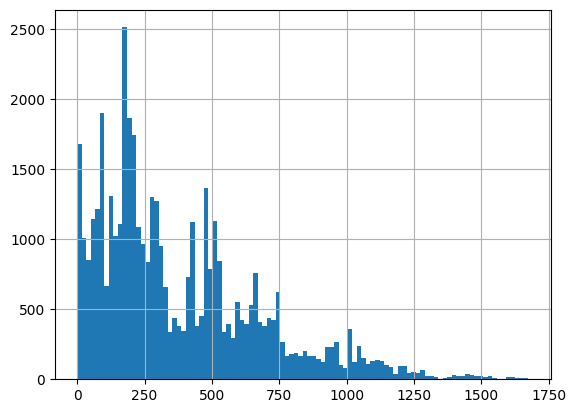

In [ ]:
new_df.recom_mov.hist(bins= 100)

In [ ]:
model.fit(x= [X1_train,X4_train], y= y_train, batch_size=64, epochs=30, validation_split=0.1, shuffle=True)

Epoch 1/30
563/563 [==============================] - 27s 36ms/step - loss: 6.6139 - cosine_similarity: 20.7437 - acc: 0.0051 - val_loss: 6.3737 - val_cosine_similarity: 18.8493 - val_acc: 0.0080
Epoch 2/30
563/563 [==============================] - 13s 24ms/step - loss: 6.1930 - cosine_similarity: 17.4315 - acc: 0.0106 - val_loss: 6.3855 - val_cosine_similarity: 16.8978 - val_acc: 0.0090
Epoch 3/30
563/563 [==============================] - 14s 25ms/step - loss: 6.0225 - cosine_similarity: 15.6529 - acc: 0.0144 - val_loss: 6.4671 - val_cosine_similarity: 15.4409 - val_acc: 0.0062
Epoch 4/30
563/563 [==============================] - 14s 26ms/step - loss: 5.8119 - cosine_similarity: 13.6616 - acc: 0.0202 - val_loss: 6.6219 - val_cosine_similarity: 13.2029 - val_acc: 0.0065
Epoch 5/30
563/563 [==============================] - 14s 24ms/step - loss: 5.5689 - cosine_similarity: 11.6144 - acc: 0.0290 - val_loss: 6.8137 - val_cosine_similarity: 11.8031 - val_acc: 0.0052
Epoch 6/30
563/563 [

In [ ]:

def _mean_reciprocal_rank( recommendations, ground_truth):
    """
    Calculate the Mean Reciprocal Rank (MRR) of a recommendation system.

    :param recommendations: A list of lists containing the recommended items for each query.
    :param ground_truth: A list containing the ground truth (relevant) items for each query.
    :return: The Mean Reciprocal Rank (MRR) value as a float.
    """
    assert len(recommendations) == len(ground_truth), "Recommendations and ground truth lists must have the same length."

    reciprocal_ranks = []
    hit = 0

    for rec, gt in zip(recommendations, ground_truth):

        for rank, item in enumerate(rec, start=1):
            if item == gt:
                reciprocal_ranks.append(1 / rank)
                hit += 1
                break
        else:
            reciprocal_ranks.append(0)


    mrr = sum(reciprocal_ranks) / len(reciprocal_ranks)
    hit_rate =(hit/len(ground_truth)) * 100
    return mrr, hit_rate







def _predictor(X_test):

    '''generate y_pred (which is top 100 product indices) from the model for X_test. '''

    batch_size = 64
    num_batches = int(len(X_test[0]) / batch_size)

    y_pred = []
    for batch_idx in range(num_batches+1):

        if batch_idx < num_batches:
            start_idx = batch_idx * batch_size
            end_idx = (batch_idx + 1) * batch_size

            inputs = []

            for i in range(len(X_test)):
                inputs.append(X_test[i][start_idx:end_idx])

            predictions = model.predict(inputs)
            recom_size = 100
            #print(np.argmax(predictions, axis = 1))

            top_preds = np.argpartition(predictions, -recom_size, axis=1)[:, -recom_size:]
            sorted_indices = np.argsort(predictions[np.arange(len(predictions))[:, None], top_preds], axis=1)[:, ::-1]
            recom = top_preds[np.arange(len(predictions))[:, None], sorted_indices]

            y_pred.append(recom)


        else:

            inputs = []

            for i in range(len(X_test)):

                inputs.append(X_test[i][end_idx:])

            predictions = model.predict(inputs)

            top_preds = np.argpartition(predictions, -recom_size, axis=1)[:, -recom_size:]
            sorted_indices = np.argsort(predictions[np.arange(len(predictions))[:, None], top_preds], axis=1)[:, ::-1]
            recom = top_preds[np.arange(len(predictions))[:, None], sorted_indices]

            y_pred.append(recom)

    y_pred = [inner_list for outer_list in y_pred for inner_list in outer_list]

    return y_pred

### Calculate MRR using top K from probability distributions

In [ ]:
import numpy as np
recommendation = _predictor([X1_train[1500:2000], X4_train[1500:2000]])
gnd = y_train[1500:2000].tolist()
test1_MRR, hit_rate = _mean_reciprocal_rank(recommendation, gnd)
print(f'MRR for test1: {test1_MRR} and Hit_rate: {hit_rate}')

2/2 [==============================] - 0s 7ms/step
MRR for test1: 0.7723441649276187 and Hit_rate: 100.0


In [ ]:
recommendation = _predictor([X1_test, X4_test])
gnd = y_test.tolist()
test1_MRR, hit_rate = _mean_reciprocal_rank(recommendation, gnd)
print(f'MRR for test1: {test1_MRR} and Hit_rate: {hit_rate}')

1/1 [==============================] - 0s 21ms/step
MRR for test1: 0.01666012641806191 and Hit_rate: 27.56294964028777


### Calculate MRR on top K selected based on cosine distance of Embedding vector of predicted label

In [ ]:
  pip install faiss-cpu

In [ ]:
EmbeddingLayer = model.get_layer('dense_output')  # Replace with the actual name of your embedding layer
EmbeddingTable = EmbeddingLayer.get_weights()[0].T

In [ ]:
serving_model = model
serving_model = tf.keras.models.Model(inputs=model.input, outputs=model.get_layer('dense_2_batchNorm').output)

In [ ]:
y_pred = serving_model.predict([X1_test,X4_test])
y_pred.shape

139/139 [==============================] - 1s 5ms/step


(4448, 128)

In [ ]:
serving_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 movie_id_list (InputLayer)  [(None, 19)]                 0         []                            
                                                                                                  
 features_embeddings (Embed  (None, 19, 128)              215424    ['movie_id_list[0][0]']       
 ding)                                                                                            
                                                                                                  
 l2_norm_1 (L2NormLayer)     (None, None, 128)            0         ['features_embeddings[0][0]'] 
                                                                                                  
 aggregate_embeddings (Mask  (None, 128)                  0         ['l2_norm_1[0][0]']     

### Performance with Dot product and take top 100

In [ ]:
import faiss

q_list = y_pred
data = EmbeddingTable
#faiss.normalize_L2(data)
# Step 2: Create an index
d = data.shape[1]
index = faiss.IndexFlatIP(d)

# Step 3: Add data to the index
index.add(data)

# Step 4: Perform a search
k = 100
query_vector = q_list
#faiss.normalize_L2(query_vector)
distances, indices = index.search(query_vector, k)

print("Distances to nearest neighbors:", distances)
print("Indices of nearest neighbors:", indices)


Distances to nearest neighbors: [[ 9.985904    7.2803497   6.276829   ... -1.3839407  -1.4006315
  -1.4140408 ]
 [ 7.7053123   7.156965    6.988532   ...  2.3086846   2.2837806
   2.2725036 ]
 [ 8.604311    8.210104    7.696707   ...  0.7664999   0.73669285
   0.6930857 ]
 ...
 [10.636323    9.145423    9.020512   ...  3.9636598   3.954882
   3.860992  ]
 [ 6.3512573   5.473419    4.9153233  ... -1.4011312  -1.4373937
  -1.444546  ]
 [ 8.019751    7.6810293   7.6203394  ...  1.5565803   1.5559758
   1.5301342 ]]
Indices of nearest neighbors: [[ 134  356  474 ...   42   73   97]
 [ 498    5  155 ...   54  479 1070]
 [ 294  222  237 ...   30  746 1007]
 ...
 [ 109  150  287 ...   52  288  525]
 [ 250  156  919 ...  118  191  603]
 [ 254  342  609 ...  436  416  581]]


In [ ]:
recommendation = indices
test2_MRR, hit_rate = _mean_reciprocal_rank(recommendation, gnd)
print(f'MRR for test1: {test2_MRR} and Hit_rate: {hit_rate}')

MRR for test1: 0.014957543845332632 and Hit_rate: 26.011690647482016


### Performance with LSH+Hamming Distance

In [142]:
import numpy as np
import faiss

# Generate some random data
data = data

# Set up LSH index
num_bits = 128  # Number of bits in the hash
index = faiss.IndexLSH(128, num_bits)

# Train the LSH index
index.train(data)

# Add data to the index
index.add(data)

# Query for nearest neighbors
query_vector = query_vector
D, I = index.search(query_vector, 1683)

# print("Nearest neighbors indices:", I)
# print("Distances:", D)


recommendation = I
test2_MRR, hit_rate = _mean_reciprocal_rank(recommendation, gnd)
print(f'MRR for test1: {test2_MRR} and Hit_rate: {hit_rate}')

MRR for test1: 0.015420210801554604 and Hit_rate: 100.0


### Generating LSH encoded EmbeddingTable and QueryVectors

In [ ]:
# Extract binary representation of Embedding table (ET) since we have only ET data to index
LSH_enc_EmbedTable = faiss.vector_to_array(index.codes)  # Convert binary codes to numpy array
LSH_enc_EmbedTable = LSH_enc_EmbedTable.reshape(index.ntotal, num_bits // 8)  # Reshape to match the dimensions


In [ ]:
LSH_enc_EmbedTable.shape

(1683, 32)

In [ ]:
LSH_enc_EmbedTable

array([[ 18, 251, 246, ..., 165, 148, 112],
       [158, 148,   5, ..., 176,  92, 206],
       [215,  14,  41, ..., 124, 253, 129],
       ...,
       [ 82, 235, 246, ..., 165, 148, 112],
       [ 18, 251, 246, ..., 165, 148, 112],
       [ 82, 251, 246, ..., 165, 148, 112]], dtype=uint8)

In [ ]:
LSH_enc_EmbedTable[1680:1683]

array([[ 82, 235, 246, 223, 198,  25, 142,  96,  37,  90, 168, 196, 178,
        212,  14, 123,   9, 211, 108, 247, 120,  45,   3,  56,  29, 201,
         97, 234, 163, 165, 148, 112],
       [ 18, 251, 246, 223, 198,  25, 142,  96,  37,  90, 168, 196, 178,
        212,  14, 123,   9, 211, 108, 247, 120,  45,   3,  56,  29, 201,
         97, 234, 163, 165, 148, 112],
       [ 82, 251, 246, 223, 198,  25, 142,  96,  37,  90, 168, 196, 178,
        212,  14, 123,   9, 210, 108, 247, 120,  45,   3,  58,  29,  73,
         97, 234, 163, 165, 148, 112]], dtype=uint8)

In [ ]:
# Now we will add  query vector to index. And extract the binary representation.
# remember each number is 8 bit integer value. which is in range [0,255]

x_index = index
x_index.add(query_vector)

LSH_enc_EmbedTableQuery = faiss.vector_to_array(x_index.codes)  # Convert binary codes to numpy array
LSH_enc_EmbedTableQuery = LSH_enc_EmbedTableQuery.reshape(x_index.ntotal, num_bits // 8)  # Reshape to match the dimensions


In [ ]:
LSH_enc_EmbedTableQuery.shape
# this shape's row =  is number of rows in ET + number of query vectors
# column = number of hash bits / 8;  256 used in this code. (index = faiss.IndexLSH(128, num_bits))

(6131, 32)

In [ ]:
LSH_enc_EmbedTableQuery

array([[ 18, 251, 246, ..., 165, 148, 112],
       [158, 148,   5, ..., 176,  92, 206],
       [215,  14,  41, ..., 124, 253, 129],
       ...,
       [200, 252, 121, ...,  66, 222,  39],
       [191, 131,  68, ...,  63, 166, 235],
       [153, 153,  10, ..., 214,  58, 215]], dtype=uint8)

In [ ]:
LSH_enc_EmbedTableQuery[1680:1683]

array([[ 82, 235, 246, 223, 198,  25, 142,  96,  37,  90, 168, 196, 178,
        212,  14, 123,   9, 211, 108, 247, 120,  45,   3,  56,  29, 201,
         97, 234, 163, 165, 148, 112],
       [ 18, 251, 246, 223, 198,  25, 142,  96,  37,  90, 168, 196, 178,
        212,  14, 123,   9, 211, 108, 247, 120,  45,   3,  56,  29, 201,
         97, 234, 163, 165, 148, 112],
       [ 82, 251, 246, 223, 198,  25, 142,  96,  37,  90, 168, 196, 178,
        212,  14, 123,   9, 210, 108, 247, 120,  45,   3,  58,  29,  73,
         97, 234, 163, 165, 148, 112]], dtype=uint8)

(4448, 1683)

In [ ]:
import pandas as pd
# Save to a CSV file
df = pd.DataFrame(LSH_enc_EmbedTableQuery)
#np.savetxt('ETandQueries.csv', LSH_enc_EmbedTableQuery, delimiter=',')

In [ ]:
df.to_csv('ETandQueries.csv' )

In [ ]:
ground_truth = np.array(gnd)

In [ ]:
ground_truth.shape

(4448,)

In [ ]:
df2 = pd.DataFrame(ground_truth)
df2.to_csv('GroundTruth.csv')

In [ ]:


df2 = pd.read_csv('/content/ETandQueries.csv')
df2

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,56,103,41,17,55,166,161,69,239,224,56,170,118,75,83,13
1,1,66,222,101,129,220,50,85,10,91,180,221,32,83,31,162,185
2,2,72,95,69,24,151,182,149,45,42,190,34,72,41,196,186,236
3,3,223,157,73,145,163,188,39,101,60,200,120,8,67,243,50,245
4,4,87,23,241,236,49,249,23,139,50,83,122,165,47,237,199,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6126,6126,160,72,154,105,101,33,154,197,201,170,64,184,209,148,104,34
6127,6127,229,110,81,70,113,101,93,133,82,110,173,145,59,242,13,55
6128,6128,176,48,6,122,140,243,127,107,26,210,181,106,177,179,230,145
6129,6129,159,136,221,99,104,128,254,182,2,31,163,137,137,224,55,207


In [ ]:
Dist_res = pd.DataFrame(D)
Dist_res.to_csv('Dist_result.csv')

In [ ]:
Ind_res = pd.DataFrame(I)
Ind_res.to_csv('Ind_result.csv')